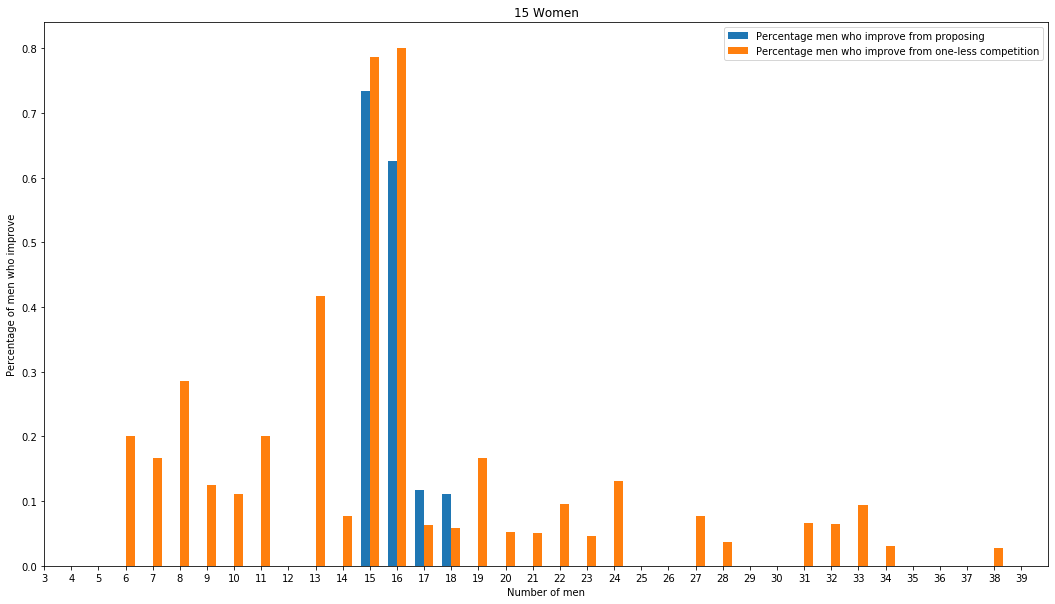

--- 22.916097164154053 seconds ---


In [63]:
import random
import copy
from pandas import *
from matplotlib import pyplot as plt
from operator import itemgetter
import numpy as np
import time

start_time = time.time()

def deferred_acceptance(proposing, not_proposing):
    
    '''
    matches is a dictionary structed as 
    woman0: []
    woman1: []
    ...
    '''
    
    matches = {}
    for i in range(len(not_proposing)):
        matches[i] = []
        
    iters=0
    
    while iters < len(proposing)*len(not_proposing):
        
        men_temp_max_choices = [-1 for i in range(len(proposing))]
        women_temp_max_choices = [-1 for i in range(len(not_proposing))]
        
        '''
        in the dictionary "matches", builds the list of men who apply to each respective woman
        0: [1]
        1: [2]
        2: [0, 3] 
        ...
        '''
        for i in range(len(proposing)):
            temp_max_value = -1
            for j in range(len(proposing[0])):
                if proposing[i][j] > temp_max_value:
                    temp_max_value = proposing[i][j]
                    men_temp_max_choices[i] = j
            matches[men_temp_max_choices[i]].append(i)
        
        
        '''
        builds women_temp_max_choices, an array of each woman's top choice
        [man, man, man, ...]
        '''
        for key, value in matches.items():
            temp_value = -1
            for i in range(len(value)):
                if not_proposing[key][value[i]] > temp_value:
                    temp_value = not_proposing[key][value[i]]
                    women_temp_max_choices[key] = value[i]

        stable_matches = [-1 for i in range(len(not_proposing))]
        for i in range(len(women_temp_max_choices)):
            stable_matches[i] = women_temp_max_choices[i]

        for i in range(len(stable_matches)):
            for j in range(len(matches[i])):
                if matches[i][j] != stable_matches[i]:
                    proposing[matches[i][j]][i] =0

        iters+=1   
        
    return stable_matches

def compare_matches(new, old, compare_men_values):
    counter = 0
    for i in range(len(compare_men_values)-1): 
        if old[i+1] == -1 and new[i+1] != -1:
            counter+=1
        elif compare_men_values[i+1][new[i+1]] > compare_men_values[i+1][old[i+1]]:
            counter+=1
        elif compare_men_values[i+1][new[i+1]] < compare_men_values[i+1][old[i+1]]:
            print("This should never be reached")
    return counter

def remove_col(arr, ith):
    itg = itemgetter(*filter((ith).__ne__, range(len(arr[0]))))
    return list(map(list, map(itg, arr)))
    
def main():

        i=15
        max_men = 40
        proposing_difference = [0 for j in range(max_men)]
        subtraction_difference = [0 for j in range(max_men)]
        for j in range(4,max_men):
            iters= 0
            proposing_counter = 0
            substraction_counter = 0
            while iters < 1:
                men_values = [[random.uniform(0,1) for size in range(i)] for _size in range(j)]
                women_values = [[random.uniform(0,1) for size in range(j)] for _size in range(i)]
                # use this instance of the values for WPDA

                awpda_women_values = copy.deepcopy(women_values)
                awpda_men_values = copy.deepcopy(men_values)
                mpda_women_values = copy.deepcopy(women_values)
                mpda_men_values = copy.deepcopy(men_values)
                compare_men_values = copy.deepcopy(men_values) # the control for comparisons

                wpda_matches = deferred_acceptance(women_values, men_values)
                mpda_matches = deferred_acceptance(mpda_men_values, mpda_women_values)
                

                del awpda_men_values[0]
                awpda_women_values =  remove_col(awpda_women_values, 0)
                awpda_matches = deferred_acceptance(awpda_women_values, awpda_men_values)

                # used to put matching in men-indexed [woman, woman, ...] format
                B = [-1 for s in range(len(men_values))]  
                for index, element in enumerate(mpda_matches):
                    if element != -1:
                        B[element] = index
                mpda_matches = B
                awpda_matches.insert(0, None)

                proposing_difference[j] += compare_matches(mpda_matches, wpda_matches, compare_men_values) / len(mpda_matches)
                subtraction_difference[j] += compare_matches(awpda_matches, wpda_matches, compare_men_values) / (len(mpda_matches) - 1)

                iters+=1
#         return(avg_worse_lesscomp)   
        men_numbers = [0 for j in range(max_men)]
        for j in range(len(proposing_difference)):
            proposing_difference[j] /= iters
            subtraction_difference[j] /= iters
            men_numbers[j] = j
        
        ind = np.arange(len(proposing_difference)) # the x locations for the groups
        width = np.min(np.diff(ind))/3
        plt.figure(figsize=(18,10))
        plt.bar(ind - width, proposing_difference , width, label='Percentage men who improve from proposing', align='edge')
        plt.bar(ind, subtraction_difference, width, label='Percentage men who improve from one-less competition', align='edge')
        plt.xlabel('Number of men')
        plt.ylabel('Percentage of men who improve')
        plt.title(f'{i} Women')
        plt.xticks(np.arange(3, 40))
        plt.xlim(3,40)
        plt.legend(loc='best')
        plt.show()
        print("--- %s seconds ---" % (time.time() - start_time))

main()    